# <center> RMS Titanic, uma tragédia do séc XX </center>

O RMS Titanic foi um navio de passageiros britânico operado pela White Star Line e construído pelos estaleiros da Harland and Wolff em Belfast. Foi a segunda embarcação da Classe Olympic de transatlânticos depois do RMS Olympic e seguido pelo HMHS Britannic. Projetado pelos engenheiros navais Alexander Carlisle e Thomas Andrews, sua construção começou em março de 1909 e ele foi lançado ao mar em maio de 1911. O Titanic foi pensado para ser o navio mais luxuoso e mais seguro de sua época, gerando lendas que era supostamente "inafundável".  
Fonte: _Wikipedia_  
  
Infelizmente, em 14 de abril de 1912 às 23h40min o Titanic se chocou com um iceberg, uma das maiores trágedias marítimas de todos os tempos.

# Origem dos dados
Esta base dados faz parte do projeto de conclusão do Nanodegree de Fundamentos em Data Science I da Udacity. Os dados fazem parte da plataforma Kaggle. Aqui existem dados demográficos de 891 dos 2208 passageiros que estavam a bordo do navio.
 

# Perguntas que serão respondidas com base na análise:

- Quantas pessoas sobreveviveram/ não sobreviveram?
- Quantos passageiros haviam em cada classe do navio?
- Qual a relação entre homems e mulheres que sobreviveram?
- Qual o valor médio pago pelos que tinham mais chance de sobreviver?
- Qual a idade média dos sobreviventes do naufrágio?
- O tipo de cabine influênciou na sobrevivência?
- Achar o  melhor fator que proporcionou a sobrevivência


## Legenda do dataset:
- Variavel | Definição	| Key
- survived | Survival | 0 = No, 1 = Yes
- pclass | Classe de embarque | 1 = 1st, 2 = 2nd, 3 = 3rd
- sex | Sexo	
- Age | Idade em anos(se < 0, idade em decimal)	
- sibsp	|  quantidade de irmãos e cônjuges que foram juntos com o passageiro	
- parch	|  quantidade de crianças e idosos (pais) que foram junto com o passageiro
- ticket | Número do ticket	
- fare | Valor da passagem em libras.	
- cabin | Número da cabine
- embarked | Porto em que embarcou | C = Cherbourg, Q = Queenstown, S = Southampton

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

df = pd.read_csv('titanic-data-6.csv')

# Agora que os dados estão carregados, mudanças serão feitas:
- Verificar como os dados estão catalogados.
- Entender quais colunas não vão ser úteis e apaga-las.
- Renomear as colunas para melhor utilização dos dados.
- Alteras as colunas para dados mais "legiveis".
- Verificar se existem dados faltantes e corrigi-los.

In [29]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [30]:
df.shape

(891, 12)

# Limpeza de dados:

Algumas colunas não são necessárias para análise, por isso retira-se <code>'Ticket','Cabin', 'PassengerId','Name'</code>, visto que não vão influenciar em resultados futuros.

In [31]:
df.drop(['Ticket','Cabin', 'PassengerId','Name'], axis = 1, inplace = True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


Renomeando as colunas.

In [32]:
df.rename(columns=lambda x: x.strip().lower(), inplace=True)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


A coluna <code>'survived'</code> esta utilizando valores binários para definir se houveram sobreviventes ou não. Existe uma melhor forma de entender isso com valores <code>Yes</code> ou <code>No</code>.  
Da mesma forma, as iniciais dos portos não deixa claro quais os nomes, o melhor é fazer uma alteração para os nomes inteiros.

In [95]:
df['survived'] = df['survived'].replace([0,1],['No','Yes'])
df['embarked'] = df['embarked'].replace(['S','C','Q'],['Southampton','Cherbourg','Queenstown'])
df.head(1)

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,No,3,male,22.0,1,0,7.25,Southampton


Aqui verifica-se como o Python está tratando esses dados, ou seja, se há algum formato incoerente.

In [34]:
df.dtypes

survived     object
pclass        int64
sex          object
age         float64
sibsp         int64
parch         int64
fare        float64
embarked     object
dtype: object

Tudo ok!  
Mantiveram-se os dados da idade em float pois passageiros com menos de um ano de idade foram considerados como decimais.

Verificando se alguma linha tem valores faltantes.

In [35]:
df.isnull().sum()

survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
dtype: int64

Ok, existem **177** ocorrências onde a idade não foi informada e **duas** occorências onde os portos não foram informados.  
Como a idade está como <code>float</code>, utiliza-se a média para preencher os valores faltantes em idade.  
Entretanto, como os portos estão em <code>string</code> a moda é a melhor forma pra preencher o que é necessário.

In [36]:
df['age'].fillna(df['age'].mean(), inplace = True);
df['embarked'].fillna(df['embarked'].mode()[0], inplace = True);
df.isnull().sum()

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

# Data Visualization!

Como irão ser feitos mais de um grafico de barras verticais, convém criar uma função para isso.

In [40]:
def bplot_relation(df,column1,column2,n_column1,n_column2,title):
    '''
    Essa função gera um gráfico de barras verticais que relaciona duas
    colunas e suas quantidades. 
    
    df = Dataframe
    column1 = A coluna relacionada ao eixo X
    column2 = A coluna relacionada ao eixo Y
    n_column1 = Nome da coluna do eixo X
    n_column2 = Nome da coluna do eixo Y
    title = Título do gráfico
    '''
    dataf = sns.countplot(data = df, x = column1, hue = column2, palette = 'Blues_d')
    
    for i in dataf.patches:
        p = i.get_bbox()
        dataf.annotate('{:.0f}'.format(p.y1 + p.y0),((p.x0 + p.x1)/2 - 0.03,p.y1 + 15))
        
    plt.ylabel(n_column2)
    plt.xlabel(n_column1)
    plt.title(title)
    plt.show()

A pergunta mais fácil a ser respondida é descobrir quantas pessoas sobreviveram ou não.

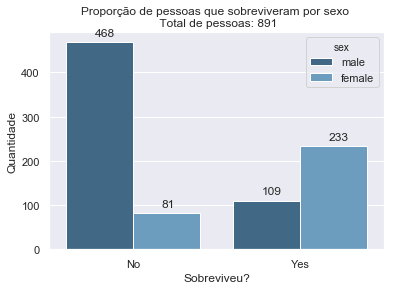

In [41]:
bplot_relation(df,'survived','sex','Sobreviveu?','Quantidade','Proporção de pessoas que sobreviveram por sexo \n Total de pessoas: {}'.format(df.shape[0]))

Aqui é possível visualizar a quantidade de passageiros que sobreviveram ou não por sexo. Ou seja, dos 891 passageiros(catalogados) no Titanic apenas **342 sobreviveram** sendo, em sua maioria, mulheres.  
É interessante descobrir qual é a proporção entre homens e mulheres.

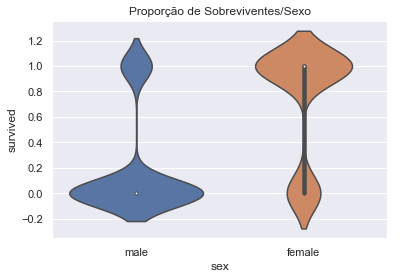

In [54]:
survSex = df.copy()
survSex['survived'] = df['survived'] == 'Yes'

sns.violinplot(data = survSex, y = 'survived', x='sex')
plt.title('Proporção de Sobreviventes/Sexo');

Com a visualização acima é possível inferir que proporcionalmente **mais mulheres sobreviveram.**

In [68]:
df['pclass'].value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

Acima temos a quantidade de passageiros por classe.  
Agora, quantos conseguiram sobreviver em cada uma?

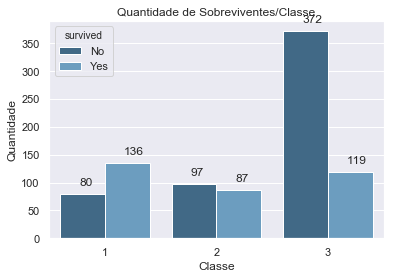

In [61]:
bplot_relation(df,'pclass','survived','Classe','Quantidade','Quantidade de Sobreviventes/Classe')

Ou seja, como visto acima, houveram mais sobreviventes nas classes mais acima do navio, entretanto, qual a proporção desses valores?

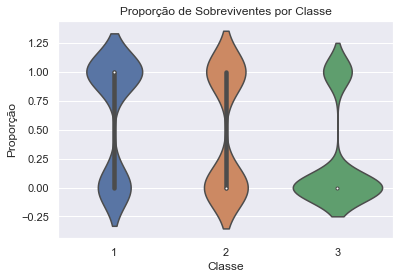

In [64]:
survClass = df.copy()
survClass['survived'] = df['survived'] == 'Yes'

sns.violinplot(data = survClass, y = 'survived', x='pclass')
plt.title('Proporção de Sobreviventes por Classe')
plt.xlabel('Classe')
plt.ylabel('Proporção');

Proporcionalmente os integrantes da primeira classe tinham mais chances de sobreviver.

De acordo com a Wikipédia:
* _O segundo oficial Lightoller se dirigiu ao capitão e sugeriu que a evacuação fosse iniciada com as mulheres e crianças_

Logo, é _provável_ que a evacuação primeiro de mulheres e crianças tenha influenciado na maior sobrevivência das mulheres(como visto no supracitado), entretanto, convém analisar a idade dos passageiros e verificar se mais crianças sobreviveram.

In [70]:
df['age'].mean()

29.699117647058763

A idade média dos passageiros do Titanic eram adultos de aproximadamente **30 anos**.  
Cria-se um novo dataset apenas com mulheres e crianças. Utilizei a maioridade brasileira brasileira para filtrar os dados, visto que a maioridade inglesa é de 10 anos.

In [97]:
primary = (df['age'] <= 18 ) & (df['age'] > 0) | (df['sex'] == "female")
primary = df[primary]
primary.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
1,Yes,1,female,38.0,1,0,71.2833,Cherbourg
2,Yes,3,female,26.0,0,0,7.9250,Southampton
3,Yes,1,female,35.0,1,0,53.1000,Southampton
7,No,3,male,2.0,3,1,21.0750,Southampton
8,Yes,3,female,27.0,0,2,11.1333,Southampton


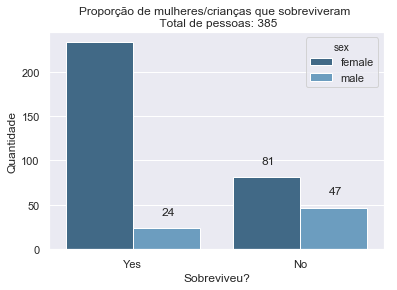

In [76]:
bplot_relation(primary,'survived','sex','Sobreviveu?','Quantidade','Proporção de mulheres/crianças que sobreviveram \n Total de pessoas: {}'.format(primary.shape[0]))


Aqui percebemos que relacionando apenas mulheres e crianças a **sobrevivência feminina foi realmente maior**.

Ou seja, já se sabe que a maior probabilidade de sobrevivência eram de crianças mulheres que estavam na primeira classe. Qual foi então o valor pago por aqueles que _tinham maiores chances de sobreviver_.

In [98]:
surv_first_class = primary[primary['pclass'] == 1].reset_index(drop = True)
#surv_first_class['sex'].unique()
surv_first_class['fare'].mean()

106.5557232323232

Logo, o valor médio da passagem é de 106,55 libras.  
Dos passageiros, mulheres e crianças que sobreviveram, qual foi o porto em que eles mais embarcaram?

In [100]:
surv_first_class['embarked'].mode()[0]

'Southampton'

Southampton foi o porto com mais embarcações.

# Resultados e conclusões:

- O naufrágio do RMS Titanic foi trágico, tendo um saldo de apenas **342 sobreviventes**(de acordo com a base de 891 passageiros) sendo **109 homens** e **233 mulheres**.
- Proporcionalmente, houveram **mais sobreviventes mulheres** do que homens.
- Os ocupantes do navio tinham, em média, aproximadamente **30 anos**.
- Proporcionalmente, mulheres e crianças estão entre os que mais sobreviveram..
- A **maior proporção de sobreviventes foram aqueles que se encontravam na 1ª classe** visto que como essa seção de cabines estava na parte superior do navio, foi a que mais demorou a afundar.
- Relacionando apenas mulheres e crianças, a **predominância femina em ter sobrevivido** continua maior.
- O valor médio, pago pelos com maior probabilidade de sobreviver foi de **£106,55**.
- O porto onde os passageiros com maior chance de sobrevivência foi **Southampton**.  

Ou seja, a maior probabilidade de sobrevivência no RMS Titanic, era o indivíduo ser uma mulher, com menos de 18 anos, estar ocupando a 1ª classe do navio e ter embarcado em Southampton. Esta moça pagou, em média £106,55.

# Limitações

A ausência de alguns valores tornou-se um fator limitante para a análise exata dos dados contidos nesta base. Estas características são: <code>Age</code> e <code>Embarked</code>.  
  
* Medida tomada:
    - Age: Como os valores desta coluna estavam como <code>float</code> tomou-se a decisão de compor os **177** faltantes com a média de idade do navio.
    - Embarked: Os portos festavam codificados como <code>string</code>, logo a melhor decisão foi preencher os **2** faltantes com a moda da coluna.

* Após isso, ajustou-se os nomes das colunas para melhor compreender e os valores dos dados para melhor apresentação visual dos dados. Foram colocados em <code>lower</code> todos os nomes de coluna, alterado as <code>keys</code> relacionadas a sobrevivência de <code>0</code> e <code>1</code> para <code>Yes</code> e <code>No</code>, e as <code>keys</code> dos portos para o nome completo dos respectivos.

Fontes utilizadas:
- https://stackoverflow.com/questions/18689823/pandas-dataframe-replace-nan-values-with-average-of-columns
- https://matplotlib.org/api/patches_api.html
- Contribuição do código para colocar dos valores acima das barras em <code>bplot_relation</code> pelo [Paulo Vasconcelos](https://paulovasconcellos.com.br/).
- https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mode.html
- https://seaborn.pydata.org/generated/seaborn.countplot.html
- https://pt.wikipedia.org/wiki/RMS_Titanic:
- https://seaborn.pydata.org/generated/seaborn.barplot.html